In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
#import warnings
#warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("netflix.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [3]:
df.rename(columns={'listed_in':'genre'},inplace=True)
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'genre', 'description'],
      dtype='object')

In [4]:
df.drop(columns='show_id',inplace=True)

In [5]:
df.isna().sum()

type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
genre              0
description        0
dtype: int64

In [6]:
df.dropna(subset =['date_added'],inplace=True)
df['date_added'].isna().sum()

0

In [7]:
df.dropna(subset=['rating'],inplace=True)
df['rating'].isna().sum()

0

In [8]:
df.dropna(subset=['duration'],inplace=True)
df['duration'].isna().sum()

0

In [9]:
df['date_added']=pd.to_datetime(df['date_added'],errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8790 entries, 0 to 8806
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   type          8790 non-null   object        
 1   title         8790 non-null   object        
 2   director      6169 non-null   object        
 3   cast          7965 non-null   object        
 4   country       7961 non-null   object        
 5   date_added    8702 non-null   datetime64[ns]
 6   release_year  8790 non-null   int64         
 7   rating        8790 non-null   object        
 8   duration      8790 non-null   object        
 9   genre         8790 non-null   object        
 10  description   8790 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(9)
memory usage: 824.1+ KB


In [10]:
df['day']=df['date_added'].dt.day
df['month']=df['date_added'].dt.month
df['year']=df['date_added'].dt.year
df['month_name']=df['date_added'].dt.month_name()
df['weekday']=df['date_added'].dt.day_name()
df.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,genre,description,day,month,year,month_name,weekday
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",25.0,9.0,2021.0,September,Saturday
1,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",24.0,9.0,2021.0,September,Friday
2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,24.0,9.0,2021.0,September,Friday
3,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",24.0,9.0,2021.0,September,Friday
4,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,24.0,9.0,2021.0,September,Friday


In [11]:
df['rating'].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', 'NR', 'TV-Y7-FV', 'UR'], dtype=object)

In [12]:
df['rating']=df['rating'].replace(['TV-Y','TV-Y7','G','TV-G','PG','TV-PG','TV-Y7-FV'],'Kids')
df['rating']=df['rating'].replace(['PG-13','TV-14'],'Teens')
df['rating']=df['rating'].replace(['R','TV-MA','NC-17'],'Adults')
df['rating']=df['rating'].replace(['NR','UR'],np.NaN)
df.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,genre,description,day,month,year,month_name,weekday
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,Teens,90 min,Documentaries,"As her father nears the end of his life, filmm...",25.0,9.0,2021.0,September,Saturday
1,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,Adults,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",24.0,9.0,2021.0,September,Friday
2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,Adults,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,24.0,9.0,2021.0,September,Friday
3,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,Adults,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",24.0,9.0,2021.0,September,Friday
4,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,Adults,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,24.0,9.0,2021.0,September,Friday


In [13]:
df['rating'].unique()

array(['Teens', 'Adults', 'Kids', nan], dtype=object)

In [14]:
df['rating'].isna().sum()

82

In [15]:
df.dropna(subset=['rating'],inplace=True)
df['rating'].isna().sum()

0

In [16]:
df[(df['director'].isna()) &  (df['country'].isna()) & (df['cast'].isna())].shape[0]

96

In [17]:
df.dropna(subset=['director','country','cast'],how='all',inplace=True)
df.shape

(8612, 16)

In [18]:
df_cast= pd.DataFrame(df['cast'].apply(lambda x: str(x).split(', ')).tolist(),index=df['title'])
df_cast

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
title,,,,,,,,,,,,,,,,,,,,,
Dick Johnson Is Dead,nan,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
Blood & Water,Ama Qamata,Khosi Ngema,Gail Mabalane,Thabang Molaba,Dillon Windvogel,Natasha Thahane,Arno Greeff,Xolile Tshabalala,Getmore Sithole,Cindy Mahlangu,...,None,None,None,None,None,None,None,None,None,None
Ganglands,Sami Bouajila,Tracy Gotoas,Samuel Jouy,Nabiha Akkari,Sofia Lesaffre,Salim Kechiouche,Noureddine Farihi,Geert Van Rampelberg,Bakary Diombera,None,...,None,None,None,None,None,None,None,None,None,None
Kota Factory,Mayur More,Jitendra Kumar,Ranjan Raj,Alam Khan,Ahsaas Channa,Revathi Pillai,Urvi Singh,Arun Kumar,None,None,...,None,None,None,None,None,None,None,None,None,None
Midnight Mass,Kate Siegel,Zach Gilford,Hamish Linklater,Henry Thomas,Kristin Lehman,Samantha Sloyan,Igby Rigney,Rahul Kohli,Annarah Cymone,Annabeth Gish,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zinzana,Ali Suliman,Saleh Bakri,Yasa,Ali Al-Jabri,Mansoor Alfeeli,Ahd,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
Zodiac,Mark Ruffalo,Jake Gyllenhaal,Robert Downey Jr.,Anthony Edwards,Brian Cox,Elias Koteas,Donal Logue,John Carroll Lynch,Dermot Mulroney,Chloë Sevigny,...,None,None,None,None,None,None,None,None,None,None
Zombieland,Jesse Eisenberg,Woody Harrelson,Emma Stone,Abigail Breslin,Amber Heard,Bill Murray,Derek Graf,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [19]:
df_cast=df_cast.stack()
df_cast

title                  
Dick Johnson Is Dead  0                      nan
Blood & Water         0               Ama Qamata
                      1              Khosi Ngema
                      2            Gail Mabalane
                      3           Thabang Molaba
                                   ...          
Zubaan                3         Manish Chaudhary
                      4             Meghna Malik
                      5            Malkeet Rauni
                      6           Anita Shabdish
                      7    Chittaranjan Tripathy
Length: 64251, dtype: object

In [20]:
df_cast=pd.DataFrame(df_cast)
df_cast

0
title                                        
Dick Johnson Is Dead 0                    nan
Blood & Water        0             Ama Qamata
                     1            Khosi Ngema
                     2          Gail Mabalane
                     3         Thabang Molaba
...                                       ...
Zubaan               3       Manish Chaudhary
                     4           Meghna Malik
                     5          Malkeet Rauni
                     6         Anita Shabdish
                     7  Chittaranjan Tripathy

[64251 rows x 1 columns]

In [21]:
df_cast.reset_index(inplace=True)
df_cast

,title,level_1,0
0,Dick Johnson Is Dead,0,nan
1,Blood & Water,0,Ama Qamata
2,Blood & Water,1,Khosi Ngema
3,Blood & Water,2,Gail Mabalane
4,Blood & Water,3,Thabang Molaba
...,...,...,...
64246,Zubaan,3,Manish Chaudhary
64247,Zubaan,4,Meghna Malik
64248,Zubaan,5,Malkeet Rauni
64249,Zubaan,6,Anita Shabdish


In [22]:
df_cast=df_cast[['title',0]]
df_cast

,title,0
0,Dick Johnson Is Dead,nan
1,Blood & Water,Ama Qamata
2,Blood & Water,Khosi Ngema
3,Blood & Water,Gail Mabalane
4,Blood & Water,Thabang Molaba
...,...,...
64246,Zubaan,Manish Chaudhary
64247,Zubaan,Meghna Malik
64248,Zubaan,Malkeet Rauni
64249,Zubaan,Anita Shabdish


In [23]:
df_cast.columns=['title','cast']
df_cast.replace('nan',np.NaN,inplace=True)
df_cast.isna().sum()

C:\Users\Harshita\AppData\Local\Temp\ipykernel_8836\1244274466.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cast.replace('nan',np.NaN,inplace=True)


title      0
cast     712
dtype: int64

In [24]:
df_genre= pd.DataFrame(df['genre'].apply(lambda x: str(x).split(', ')).tolist(),index=df['title'])
df_genre

,0,1,2
title,,,
Dick Johnson Is Dead,Documentaries,None,None
Blood & Water,International TV Shows,TV Dramas,TV Mysteries
Ganglands,Crime TV Shows,International TV Shows,TV Action & Adventure
Kota Factory,International TV Shows,Romantic TV Shows,TV Comedies
Midnight Mass,TV Dramas,TV Horror,TV Mysteries
...,...,...,...
Zinzana,Dramas,International Movies,Thrillers
Zodiac,Cult Movies,Dramas,Thrillers
Zombieland,Comedies,Horror Movies,None


In [25]:
df_genre=df_genre.stack()
df_genre

title                  
Dick Johnson Is Dead  0               Documentaries
Blood & Water         0      International TV Shows
                      1                   TV Dramas
                      2                TV Mysteries
Ganglands             0              Crime TV Shows
                                     ...           
Zoom                  0    Children & Family Movies
                      1                    Comedies
Zubaan                0                      Dramas
                      1        International Movies
                      2            Music & Musicals
Length: 18937, dtype: object

In [26]:
df_genre=pd.DataFrame(df_genre)
df_genre

0
title                                           
Dick Johnson Is Dead 0             Documentaries
Blood & Water        0    International TV Shows
                     1                 TV Dramas
                     2              TV Mysteries
Ganglands            0            Crime TV Shows
...                                          ...
Zoom                 0  Children & Family Movies
                     1                  Comedies
Zubaan               0                    Dramas
                     1      International Movies
                     2          Music & Musicals

[18937 rows x 1 columns]

In [27]:
df_genre.reset_index(inplace=True)
df_genre

,title,level_1,0
0,Dick Johnson Is Dead,0,Documentaries
1,Blood & Water,0,International TV Shows
2,Blood & Water,1,TV Dramas
3,Blood & Water,2,TV Mysteries
4,Ganglands,0,Crime TV Shows
...,...,...,...
18932,Zoom,0,Children & Family Movies
18933,Zoom,1,Comedies
18934,Zubaan,0,Dramas
18935,Zubaan,1,International Movies


In [28]:
df_genre=df_genre[['title',0]]
df_genre

,title,0
0,Dick Johnson Is Dead,Documentaries
1,Blood & Water,International TV Shows
2,Blood & Water,TV Dramas
3,Blood & Water,TV Mysteries
4,Ganglands,Crime TV Shows
...,...,...
18932,Zoom,Children & Family Movies
18933,Zoom,Comedies
18934,Zubaan,Dramas
18935,Zubaan,International Movies


In [29]:
df_genre.columns=['title','genre']
df_genre.replace('nan',np.NaN,inplace=True)
df_genre.isna().sum()

C:\Users\Harshita\AppData\Local\Temp\ipykernel_8836\3792252874.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_genre.replace('nan',np.NaN,inplace=True)


title    0
genre    0
dtype: int64

In [30]:
df_director= pd.DataFrame(df['director'].apply(lambda x: str(x).split(', ')).tolist(),index=df['title'])
df_director

,0,1,2,3,4,5,6,7,8,9,10,11,12
title,,,,,,,,,,,,,
Dick Johnson Is Dead,Kirsten Johnson,None,None,None,None,None,None,None,None,None,None,None,None
Blood & Water,nan,None,None,None,None,None,None,None,None,None,None,None,None
Ganglands,Julien Leclercq,None,None,None,None,None,None,None,None,None,None,None,None
Kota Factory,nan,None,None,None,None,None,None,None,None,None,None,None,None
Midnight Mass,Mike Flanagan,None,None,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zinzana,Majid Al Ansari,None,None,None,None,None,None,None,None,None,None,None,None
Zodiac,David Fincher,None,None,None,None,None,None,None,None,None,None,None,None
Zombieland,Ruben Fleischer,None,None,None,None,None,None,None,None,None,None,None,None


In [31]:
df_director=df_director.stack()
df_director

title                  
Dick Johnson Is Dead  0    Kirsten Johnson
Blood & Water         0                nan
Ganglands             0    Julien Leclercq
Kota Factory          0                nan
Midnight Mass         0      Mike Flanagan
                                ...       
Zinzana               0    Majid Al Ansari
Zodiac                0      David Fincher
Zombieland            0    Ruben Fleischer
Zoom                  0       Peter Hewitt
Zubaan                0        Mozez Singh
Length: 9408, dtype: object

In [32]:
df_director=pd.DataFrame(df_director)
df_director

,,0
title,,
Dick Johnson Is Dead,0,Kirsten Johnson
Blood & Water,0,nan
Ganglands,0,Julien Leclercq
Kota Factory,0,nan
Midnight Mass,0,Mike Flanagan
...,...,...
Zinzana,0,Majid Al Ansari
Zodiac,0,David Fincher
Zombieland,0,Ruben Fleischer


In [33]:
df_director.reset_index(inplace=True)
df_director

,title,level_1,0
0,Dick Johnson Is Dead,0,Kirsten Johnson
1,Blood & Water,0,nan
2,Ganglands,0,Julien Leclercq
3,Kota Factory,0,nan
4,Midnight Mass,0,Mike Flanagan
...,...,...,...
9403,Zinzana,0,Majid Al Ansari
9404,Zodiac,0,David Fincher
9405,Zombieland,0,Ruben Fleischer
9406,Zoom,0,Peter Hewitt


In [34]:
df_director=df_director[['title',0]]
df_director

,title,0
0,Dick Johnson Is Dead,Kirsten Johnson
1,Blood & Water,nan
2,Ganglands,Julien Leclercq
3,Kota Factory,nan
4,Midnight Mass,Mike Flanagan
...,...,...
9403,Zinzana,Majid Al Ansari
9404,Zodiac,David Fincher
9405,Zombieland,Ruben Fleischer
9406,Zoom,Peter Hewitt


In [35]:
df_director.columns=['title','director']
df_director.replace('nan',np.NaN,inplace=True)
df_director.isna().sum()

C:\Users\Harshita\AppData\Local\Temp\ipykernel_8836\2304972890.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_director.replace('nan',np.NaN,inplace=True)


title          0
director    2521
dtype: int64

In [36]:
df_country = pd.DataFrame(df['country'].apply(lambda x: str(x).split(', ')).tolist(),index=df['title'])
df_country = df_country.stack()
df_country = pd.DataFrame(df_country)
df_country.reset_index(inplace=True)
df_country = df_country[['title',0]]
df_country.columns =['title','country']
df_country.replace('nan',np.NaN,inplace=True)
df_country.isna().sum()

title        0
country    733
dtype: int64

In [37]:
df12=df_cast.merge(df_genre,on ='title')
df12

,title,cast,genre
0,Dick Johnson Is Dead,NaN,Documentaries
1,Blood & Water,Ama Qamata,International TV Shows
2,Blood & Water,Ama Qamata,TV Dramas
3,Blood & Water,Ama Qamata,TV Mysteries
4,Blood & Water,Khosi Ngema,International TV Shows
...,...,...,...
147927,Zubaan,Anita Shabdish,International Movies
147928,Zubaan,Anita Shabdish,Music & Musicals
147929,Zubaan,Chittaranjan Tripathy,Dramas
147930,Zubaan,Chittaranjan Tripathy,International Movies


In [38]:
df123=df_director.merge(df12, on='title')
df123

,title,director,cast,genre
0,Dick Johnson Is Dead,Kirsten Johnson,NaN,Documentaries
1,Blood & Water,NaN,Ama Qamata,International TV Shows
2,Blood & Water,NaN,Ama Qamata,TV Dramas
3,Blood & Water,NaN,Ama Qamata,TV Mysteries
4,Blood & Water,NaN,Khosi Ngema,International TV Shows
...,...,...,...,...
159583,Zubaan,Mozez Singh,Anita Shabdish,International Movies
159584,Zubaan,Mozez Singh,Anita Shabdish,Music & Musicals
159585,Zubaan,Mozez Singh,Chittaranjan Tripathy,Dramas
159586,Zubaan,Mozez Singh,Chittaranjan Tripathy,International Movies


In [39]:
df1234=df_country.merge(df123,on='title')
df1234

,title,country,director,cast,genre
0,Dick Johnson Is Dead,United States,Kirsten Johnson,NaN,Documentaries
1,Blood & Water,South Africa,NaN,Ama Qamata,International TV Shows
2,Blood & Water,South Africa,NaN,Ama Qamata,TV Dramas
3,Blood & Water,South Africa,NaN,Ama Qamata,TV Mysteries
4,Blood & Water,South Africa,NaN,Khosi Ngema,International TV Shows
...,...,...,...,...,...
199945,Zubaan,India,Mozez Singh,Anita Shabdish,International Movies
199946,Zubaan,India,Mozez Singh,Anita Shabdish,Music & Musicals
199947,Zubaan,India,Mozez Singh,Chittaranjan Tripathy,Dramas
199948,Zubaan,India,Mozez Singh,Chittaranjan Tripathy,International Movies


In [40]:
df_new=df.merge(df1234,on='title')
df_new

,type,title,director_x,cast_x,country_x,date_added,release_year,rating,duration,genre_x,description,day,month,year,month_name,weekday,country_y,director_y,cast_y,genre_y
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,Teens,90 min,Documentaries,"As her father nears the end of his life, filmm...",25.0,9.0,2021.0,September,Saturday,United States,Kirsten Johnson,NaN,Documentaries
1,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,Adults,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",24.0,9.0,2021.0,September,Friday,South Africa,NaN,Ama Qamata,International TV Shows
2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,Adults,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",24.0,9.0,2021.0,September,Friday,South Africa,NaN,Ama Qamata,TV Dramas
3,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,Adults,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",24.0,9.0,2021.0,September,Friday,South Africa,NaN,Ama Qamata,TV Mysteries
4,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,Adults,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",24.0,9.0,2021.0,September,Friday,South Africa,NaN,Khosi Ngema,International TV Shows
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199945,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2019-03-02,2015,Teens,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,2.0,3.0,2019.0,March,Saturday,India,Mozez Singh,Anita Shabdish,International Movies
199946,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2019-03-02,2015,Teens,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,2.0,3.0,2019.0,March,Saturday,India,Mozez Singh,Anita Shabdish,Music & Musicals
199947,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2019-03-02,2015,Teens,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,2.0,3.0,2019.0,March,Saturday,India,Mozez Singh,Chittaranjan Tripathy,Dramas
199948,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2019-03-02,2015,Teens,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,2.0,3.0,2019.0,March,Saturday,India,Mozez Singh,Chittaranjan Tripathy,International Movies


In [41]:
df_new.drop(columns=['cast_x','country_x','director_x','genre_x'],inplace=True)
df_new.rename(columns={'country_y':'country','director_y':'director','cast_y':'cast','genre_y':'genre'},inplace=True)
df_new.head()

,type,title,date_added,release_year,rating,duration,description,day,month,year,month_name,weekday,country,director,cast,genre
0,Movie,Dick Johnson Is Dead,2021-09-25,2020,Teens,90 min,"As her father nears the end of his life, filmm...",25.0,9.0,2021.0,September,Saturday,United States,Kirsten Johnson,NaN,Documentaries
1,TV Show,Blood & Water,2021-09-24,2021,Adults,2 Seasons,"After crossing paths at a party, a Cape Town t...",24.0,9.0,2021.0,September,Friday,South Africa,NaN,Ama Qamata,International TV Shows
2,TV Show,Blood & Water,2021-09-24,2021,Adults,2 Seasons,"After crossing paths at a party, a Cape Town t...",24.0,9.0,2021.0,September,Friday,South Africa,NaN,Ama Qamata,TV Dramas
3,TV Show,Blood & Water,2021-09-24,2021,Adults,2 Seasons,"After crossing paths at a party, a Cape Town t...",24.0,9.0,2021.0,September,Friday,South Africa,NaN,Ama Qamata,TV Mysteries
4,TV Show,Blood & Water,2021-09-24,2021,Adults,2 Seasons,"After crossing paths at a party, a Cape Town t...",24.0,9.0,2021.0,September,Friday,South Africa,NaN,Khosi Ngema,International TV Shows


In [42]:
null=df_new.isna().sum()
null

type                0
title               0
date_added       1546
release_year        0
rating              0
duration            0
description         0
day              1546
month            1546
year             1546
month_name       1546
weekday          1546
country         11710
director        50116
cast             1894
genre               0
dtype: int64

In [43]:
df_new['cast']=df_new['cast'].replace(np.NaN,'Unknown')
df_new['country']=df_new['country'].replace(np.NaN,'Unknown')
df_new['director']=df_new['director'].replace(np.NaN,'Unknown')

In [44]:
df_new.head()

,type,title,date_added,release_year,rating,duration,description,day,month,year,month_name,weekday,country,director,cast,genre
0,Movie,Dick Johnson Is Dead,2021-09-25,2020,Teens,90 min,"As her father nears the end of his life, filmm...",25.0,9.0,2021.0,September,Saturday,United States,Kirsten Johnson,Unknown,Documentaries
1,TV Show,Blood & Water,2021-09-24,2021,Adults,2 Seasons,"After crossing paths at a party, a Cape Town t...",24.0,9.0,2021.0,September,Friday,South Africa,Unknown,Ama Qamata,International TV Shows
2,TV Show,Blood & Water,2021-09-24,2021,Adults,2 Seasons,"After crossing paths at a party, a Cape Town t...",24.0,9.0,2021.0,September,Friday,South Africa,Unknown,Ama Qamata,TV Dramas
3,TV Show,Blood & Water,2021-09-24,2021,Adults,2 Seasons,"After crossing paths at a party, a Cape Town t...",24.0,9.0,2021.0,September,Friday,South Africa,Unknown,Ama Qamata,TV Mysteries
4,TV Show,Blood & Water,2021-09-24,2021,Adults,2 Seasons,"After crossing paths at a party, a Cape Town t...",24.0,9.0,2021.0,September,Friday,South Africa,Unknown,Khosi Ngema,International TV Shows


In [45]:
df_new.dropna(inplace=True)

In [46]:
df_new.isnull().sum()

type            0
title           0
date_added      0
release_year    0
rating          0
duration        0
description     0
day             0
month           0
year            0
month_name      0
weekday         0
country         0
director        0
cast            0
genre           0
dtype: int64

In [47]:
df_new.drop_duplicates(keep='first',inplace=True)

In [48]:
df_new.shape

(198349, 16)

In [49]:
df_movies=df_new.loc[df_new['type']=='Movie']
df_tvs=df_new.loc[df_new['type']=='TV Show']

In [50]:
df_movies.shape

(144240, 16)

In [51]:
df_tvs.shape

(54109, 16)

In [52]:
df_movies['duration']=df_movies['duration'].str.replace('min','')
df_movies.head()

C:\Users\Harshita\AppData\Local\Temp\ipykernel_8836\2494661631.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_movies['duration']=df_movies['duration'].str.replace('min','')


,type,title,date_added,release_year,rating,duration,description,day,month,year,month_name,weekday,country,director,cast,genre
0,Movie,Dick Johnson Is Dead,2021-09-25,2020,Teens,90,"As her father nears the end of his life, filmm...",25.0,9.0,2021.0,September,Saturday,United States,Kirsten Johnson,Unknown,Documentaries
157,Movie,My Little Pony: A New Generation,2021-09-24,2021,Kids,91,Equestria's divided. But a bright-eyed hero be...,24.0,9.0,2021.0,September,Friday,Unknown,Robert Cullen,Vanessa Hudgens,Children & Family Movies
158,Movie,My Little Pony: A New Generation,2021-09-24,2021,Kids,91,Equestria's divided. But a bright-eyed hero be...,24.0,9.0,2021.0,September,Friday,Unknown,Robert Cullen,Kimiko Glenn,Children & Family Movies
159,Movie,My Little Pony: A New Generation,2021-09-24,2021,Kids,91,Equestria's divided. But a bright-eyed hero be...,24.0,9.0,2021.0,September,Friday,Unknown,Robert Cullen,James Marsden,Children & Family Movies
160,Movie,My Little Pony: A New Generation,2021-09-24,2021,Kids,91,Equestria's divided. But a bright-eyed hero be...,24.0,9.0,2021.0,September,Friday,Unknown,Robert Cullen,Sofia Carson,Children & Family Movies


In [53]:
df_tvs['duration']=df_tvs['duration'].str.replace('Seasons','')
df_tvs['duration']=df_tvs['duration'].str.replace('Season','')
df_tvs.head()

C:\Users\Harshita\AppData\Local\Temp\ipykernel_8836\2841570241.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tvs['duration']=df_tvs['duration'].str.replace('Seasons','')
C:\Users\Harshita\AppData\Local\Temp\ipykernel_8836\2841570241.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tvs['duration']=df_tvs['duration'].str.replace('Season','')


,type,title,date_added,release_year,rating,duration,description,day,month,year,month_name,weekday,country,director,cast,genre
1,TV Show,Blood & Water,2021-09-24,2021,Adults,2,"After crossing paths at a party, a Cape Town t...",24.0,9.0,2021.0,September,Friday,South Africa,Unknown,Ama Qamata,International TV Shows
2,TV Show,Blood & Water,2021-09-24,2021,Adults,2,"After crossing paths at a party, a Cape Town t...",24.0,9.0,2021.0,September,Friday,South Africa,Unknown,Ama Qamata,TV Dramas
3,TV Show,Blood & Water,2021-09-24,2021,Adults,2,"After crossing paths at a party, a Cape Town t...",24.0,9.0,2021.0,September,Friday,South Africa,Unknown,Ama Qamata,TV Mysteries
4,TV Show,Blood & Water,2021-09-24,2021,Adults,2,"After crossing paths at a party, a Cape Town t...",24.0,9.0,2021.0,September,Friday,South Africa,Unknown,Khosi Ngema,International TV Shows
5,TV Show,Blood & Water,2021-09-24,2021,Adults,2,"After crossing paths at a party, a Cape Town t...",24.0,9.0,2021.0,September,Friday,South Africa,Unknown,Khosi Ngema,TV Dramas


In [54]:
df_tvs.rename(columns={'duration':'Seasons'},inplace=True)

C:\Users\Harshita\AppData\Local\Temp\ipykernel_8836\669257150.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tvs.rename(columns={'duration':'Seasons'},inplace=True)


In [55]:
df_tvs

,type,title,date_added,release_year,rating,Seasons,description,day,month,year,month_name,weekday,country,director,cast,genre
1,TV Show,Blood & Water,2021-09-24,2021,Adults,2,"After crossing paths at a party, a Cape Town t...",24.0,9.0,2021.0,September,Friday,South Africa,Unknown,Ama Qamata,International TV Shows
2,TV Show,Blood & Water,2021-09-24,2021,Adults,2,"After crossing paths at a party, a Cape Town t...",24.0,9.0,2021.0,September,Friday,South Africa,Unknown,Ama Qamata,TV Dramas
3,TV Show,Blood & Water,2021-09-24,2021,Adults,2,"After crossing paths at a party, a Cape Town t...",24.0,9.0,2021.0,September,Friday,South Africa,Unknown,Ama Qamata,TV Mysteries
4,TV Show,Blood & Water,2021-09-24,2021,Adults,2,"After crossing paths at a party, a Cape Town t...",24.0,9.0,2021.0,September,Friday,South Africa,Unknown,Khosi Ngema,International TV Shows
5,TV Show,Blood & Water,2021-09-24,2021,Adults,2,"After crossing paths at a party, a Cape Town t...",24.0,9.0,2021.0,September,Friday,South Africa,Unknown,Khosi Ngema,TV Dramas
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199823,TV Show,Zindagi Gulzar Hai,2016-12-15,2012,Kids,1,"Strong-willed, middle-class Kashaf and carefre...",15.0,12.0,2016.0,December,Thursday,Pakistan,Unknown,Javed Sheikh,Romantic TV Shows
199824,TV Show,Zindagi Gulzar Hai,2016-12-15,2012,Kids,1,"Strong-willed, middle-class Kashaf and carefre...",15.0,12.0,2016.0,December,Thursday,Pakistan,Unknown,Javed Sheikh,TV Dramas
199825,TV Show,Zindagi Gulzar Hai,2016-12-15,2012,Kids,1,"Strong-willed, middle-class Kashaf and carefre...",15.0,12.0,2016.0,December,Thursday,Pakistan,Unknown,Hina Khawaja Bayat,International TV Shows
199826,TV Show,Zindagi Gulzar Hai,2016-12-15,2012,Kids,1,"Strong-willed, middle-class Kashaf and carefre...",15.0,12.0,2016.0,December,Thursday,Pakistan,Unknown,Hina Khawaja Bayat,Romantic TV Shows


In [56]:
df.groupby('type')['type'].count()

type
Movie      6031
TV Show    2581
Name: type, dtype: int64

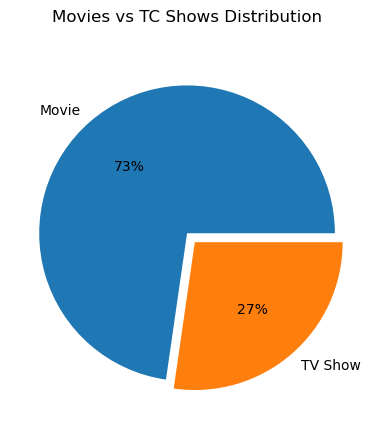

In [57]:
labels=['Movie','TV Show']
plt.pie(df_new.groupby('type')['type'].count(),labels=labels,explode=(0.08,0),autopct='%0.0f%%')
plt.suptitle('Movies vs TC Shows Distribution')
plt.show()

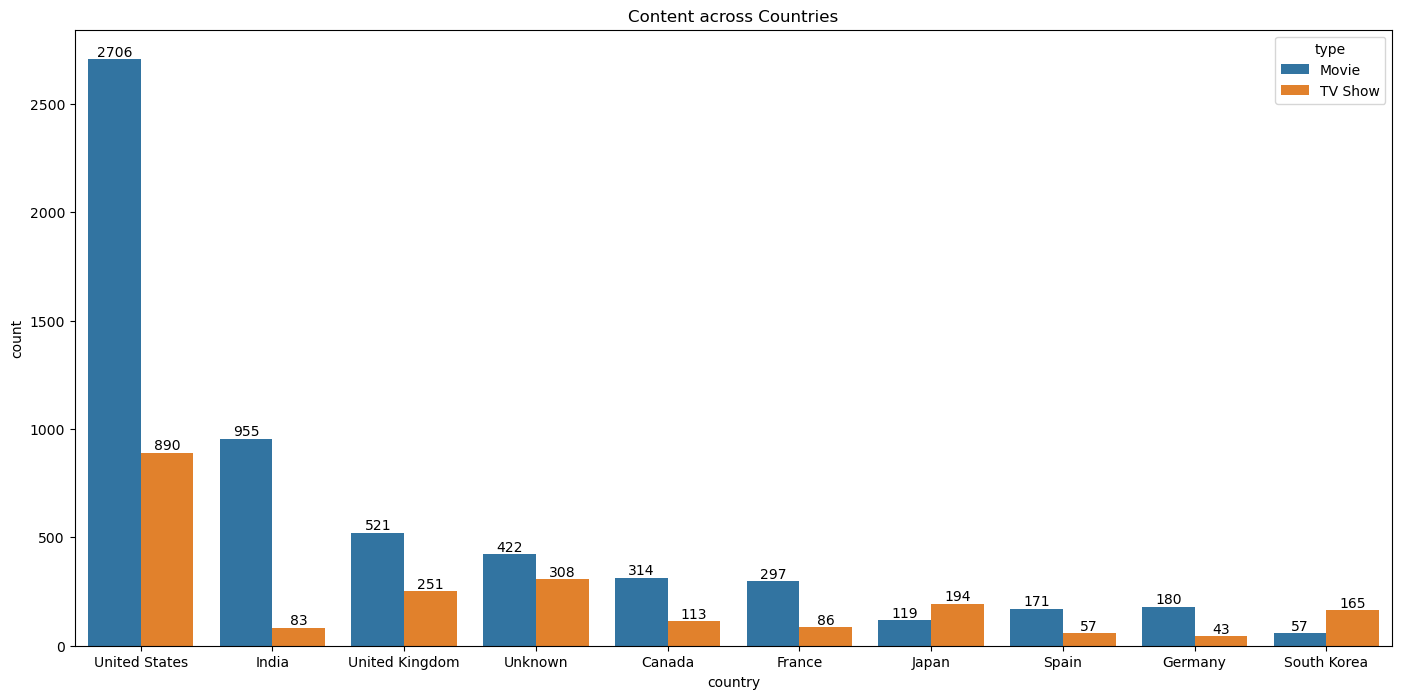

<Figure size 640x480 with 0 Axes>

In [58]:
df_temp=df_new.drop_duplicates(subset=['country','title'])
x=df_temp['country'].value_counts().head(10)
plt.figure(figsize=(17,8))
plt.title('Content across Countries')
label=sns.countplot(data=df_temp,x='country',hue='type',order=x.index)
for i in label.containers:
    label.bar_label(i)
plt.show()
plt.savefig('2.jpg')

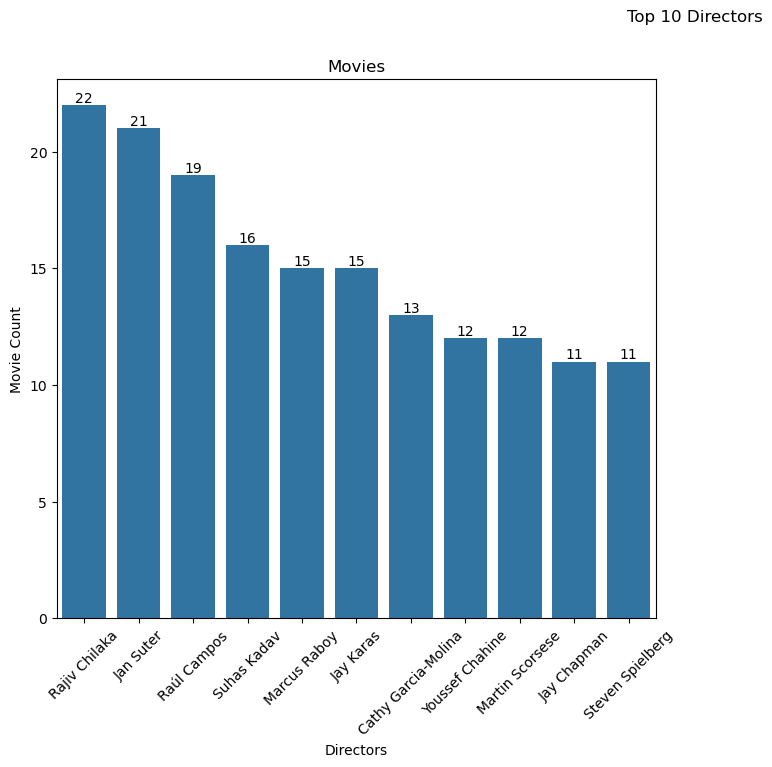

In [59]:
df_movies_temp = df_movies.drop_duplicates(subset = ['director', 'title'])

plt.figure(figsize = (17,7))
plt.suptitle('Top 10 Directors')
plt.subplot(1,2,1)
label = sns.countplot(data=df_movies_temp, x='director',order=df_movies_temp['director'].value_counts()[1:12].index)
for i in label.containers:
    label.bar_label(i)

plt.title("Movies")
plt.xticks (rotation=45)
plt.xlabel('Directors')
plt.ylabel('Movie Count')
plt. show() 

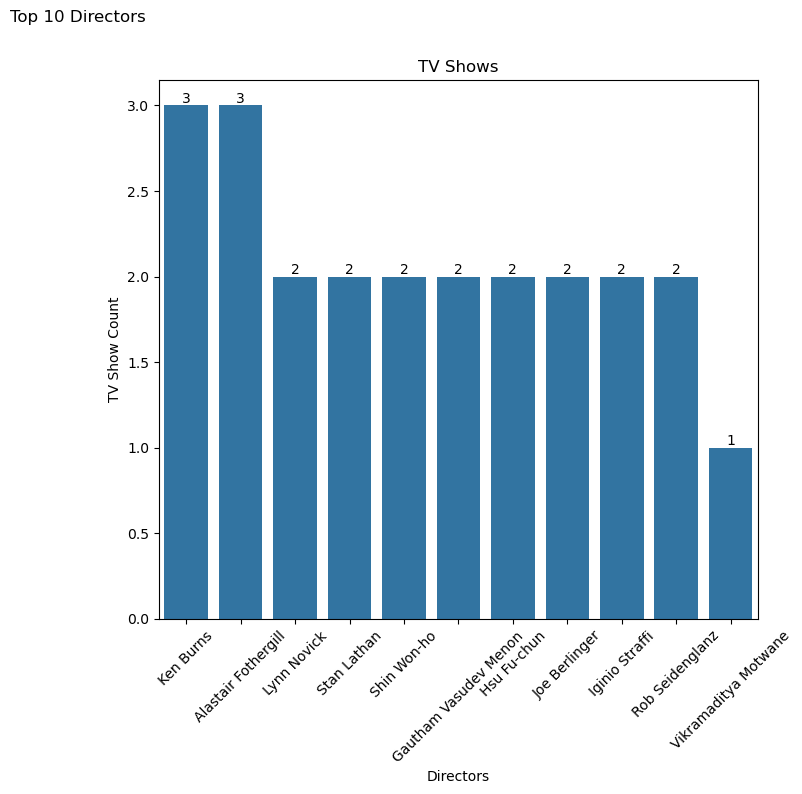

In [60]:
df_tvs_temp = df_tvs.drop_duplicates(subset = ['director', 'title'])

plt.figure(figsize = (17,7))
plt.suptitle('Top 10 Directors')
plt.subplot(1,2,2)

label = sns.countplot(data=df_tvs_temp, x='director',order=df_tvs_temp['director'].value_counts()[1:12].index)

for i in label.containers:
    label.bar_label(i)

plt.title("TV Shows")
plt.xticks (rotation=45)
plt.xlabel('Directors')
plt.ylabel('TV Show Count')
plt.show()

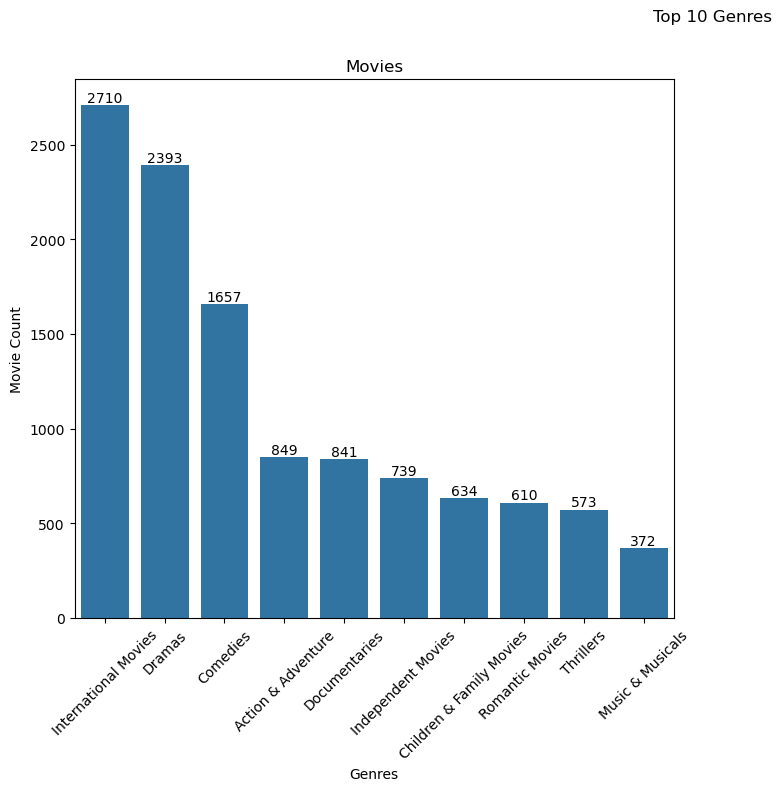

In [61]:
df_movies_temp = df_movies.drop_duplicates(subset = ['genre', 'title'])

plt.figure(figsize = (17,7))
plt.suptitle('Top 10 Genres')
plt.subplot(1,2,1)
label = sns.countplot(data=df_movies_temp, x='genre',order=df_movies_temp['genre'].value_counts().head(10).index)
for i in label.containers:
    label.bar_label(i)

plt.title("Movies")
plt.xticks (rotation=45)
plt.xlabel('Genres')
plt.ylabel('Movie Count')
plt. show() 

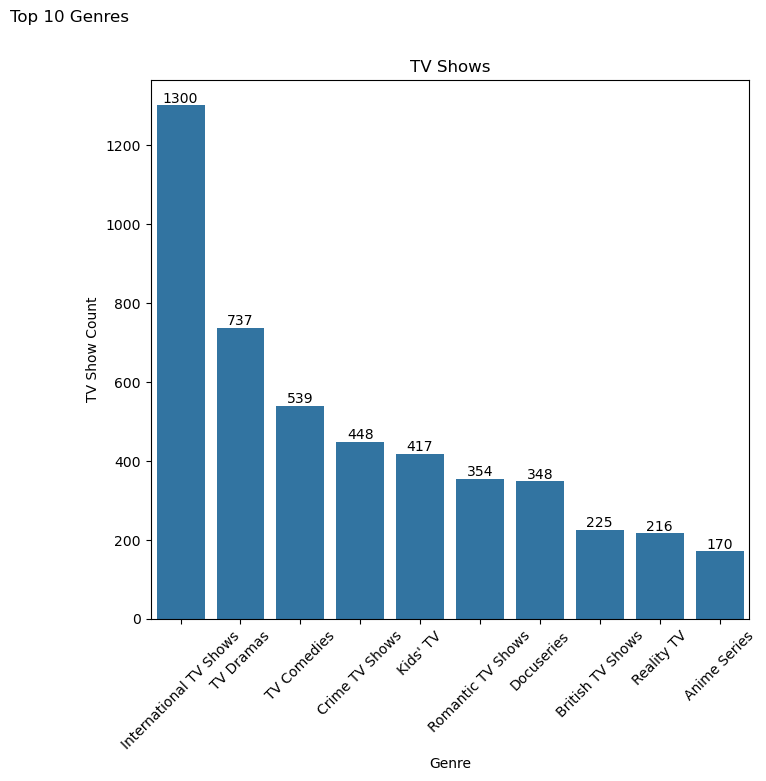

In [62]:
df_tvs_temp = df_tvs.drop_duplicates(subset = ['genre', 'title'])

plt.figure(figsize = (17,7))
plt.suptitle('Top 10 Genres')
plt.subplot(1,2,2)

label = sns.countplot(data=df_tvs_temp, x='genre',order=df_tvs_temp['genre'].value_counts().head(10).index)

for i in label.containers:
    label.bar_label(i)

plt.title("TV Shows")
plt.xticks (rotation=45)
plt.xlabel('Genre')
plt.ylabel('TV Show Count')
plt.show()

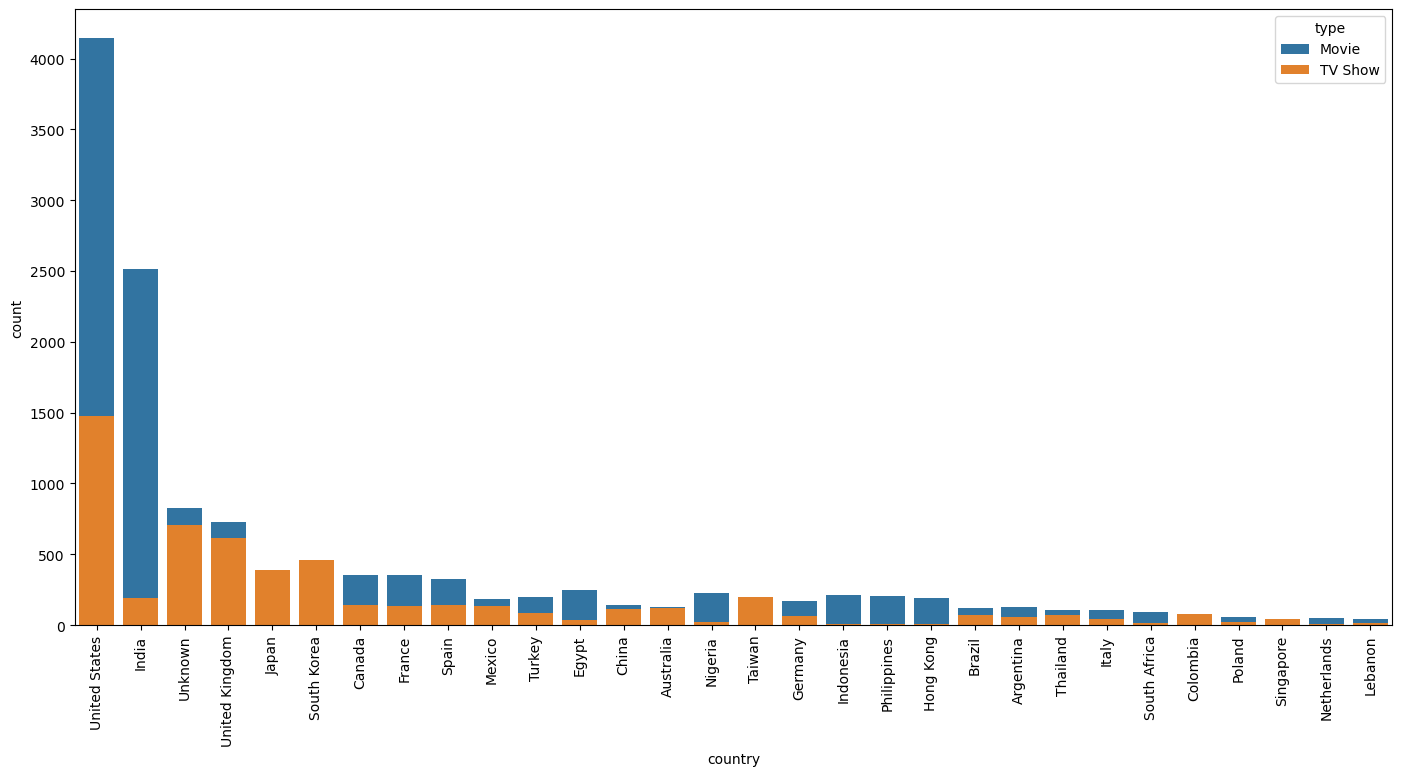

In [63]:
df_temp=df_new.drop_duplicates(subset=['genre','title'])
plt.figure(figsize=(17,8))
plt.xticks(rotation=90)
sns.countplot(data=df_temp,x='country',hue='type',dodge=False,
             order=df_temp['country'].value_counts().head(30).index)
plt.show()

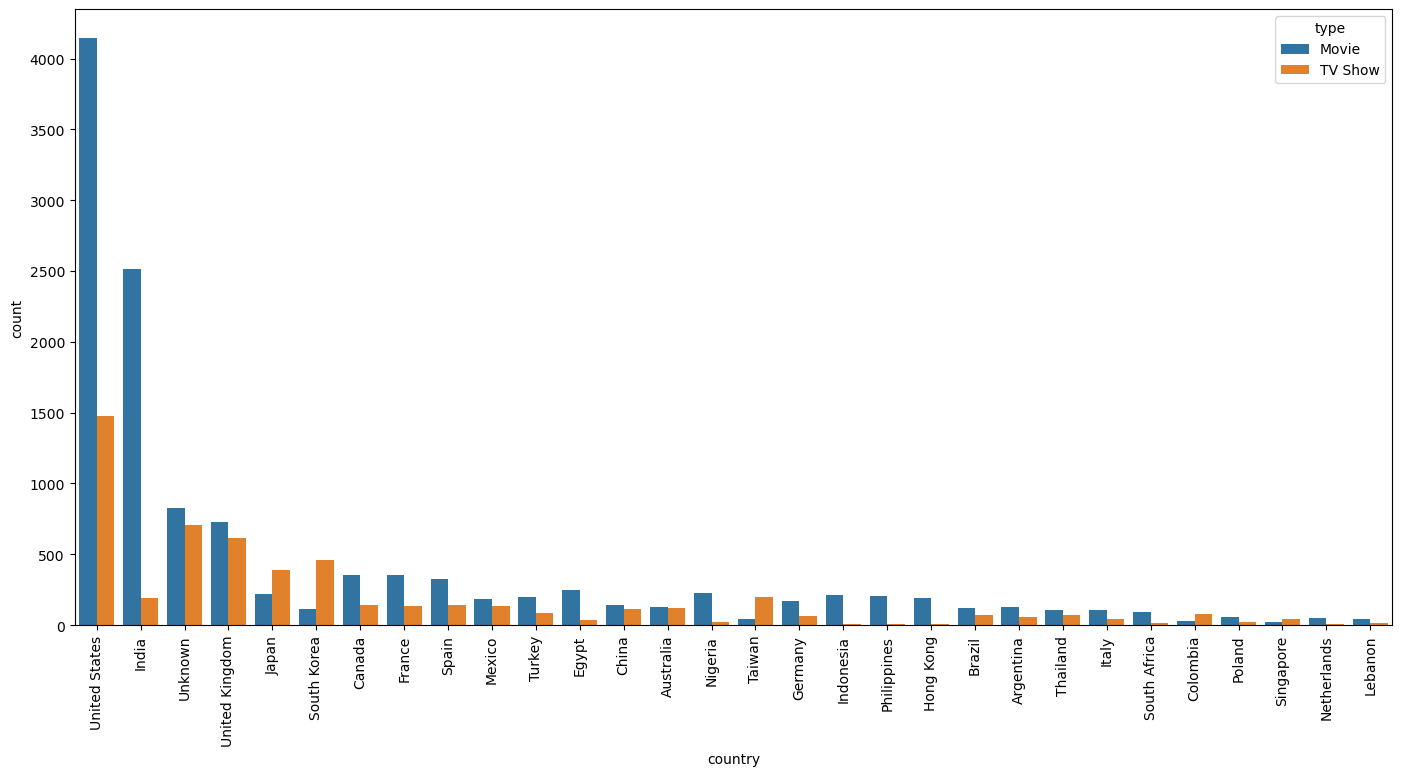

In [64]:
df_temp=df_new.drop_duplicates(subset=['genre','title'])
plt.figure(figsize=(17,8))
plt.xticks(rotation=90)
sns.countplot(data=df_temp,x='country',hue='type',
             order=df_temp['country'].value_counts().head(30).index)
plt.show()

# Pie chart

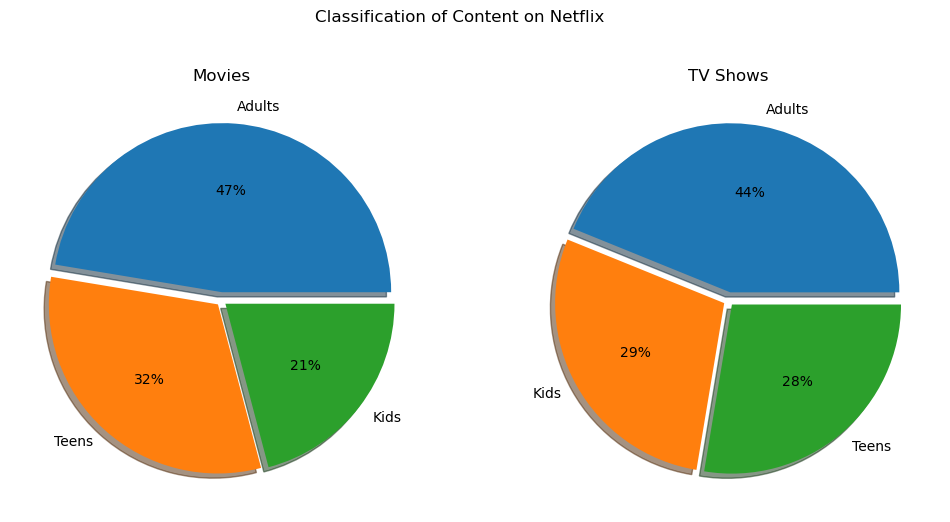

In [66]:
df_movies_temp=df_movies.drop_duplicates(subset=['rating','title'])
df_tvs_temp=df_tvs.drop_duplicates(subset=['rating','title'])

plt.figure(figsize=(12,6))
plt.suptitle('Classification of Content on Netflix')

plt.subplot(1,2,1)
plt.pie(df_movies_temp['rating'].value_counts(),labels=df_movies_temp['rating'].value_counts().index,
       autopct='%.0f%%',explode=(0.05,0.03,0.03),shadow=True)
plt.title('Movies')

plt.subplot(1,2,2)
plt.pie(df_tvs_temp['rating'].value_counts(),labels=df_tvs_temp['rating'].value_counts().index,
       autopct='%.0f%%',explode=(0.05,0.03,0.03),shadow=True)
plt.title('TV Shows')
plt.show()

In [67]:
df_movies_temp=df_movies.drop_duplicates(subset=['year','title'])

mv_year=df_movies_temp['year'].value_counts()
mv_year.sort_index(inplace=True)

month_order=['January','February','March','April','May','June','July','August','September','October','November','December']
mv_month=df_movies_temp['month_name'].value_counts().loc[month_order]

day_order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
mv_day=df_movies_temp['weekday'].value_counts().loc[day_order]

mv_month

month_name
January      535
February     375
March        518
April        542
May          433
June         485
July         559
August       515
September    510
October      535
November     489
December     535
Name: count, dtype: int64

In [68]:
mv_day

weekday
Monday        612
Tuesday       842
Wednesday     895
Thursday     1040
Friday       1537
Saturday      543
Sunday        562
Name: count, dtype: int64

C:\Users\Harshita\AppData\Local\Temp\ipykernel_8836\3053949821.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  label=sns.countplot(data=df_movies_temp,x='year',order=mv_year.index,palette='winter')
C:\Users\Harshita\AppData\Local\Temp\ipykernel_8836\3053949821.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  label=sns.countplot(data=df_movies_temp,x='month_name',order=mv_month.index,palette='spring')
C:\Users\Harshita\AppData\Local\Temp\ipykernel_8836\3053949821.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  label=sns.countplot(data=df_movies_temp,x='weekday',ord

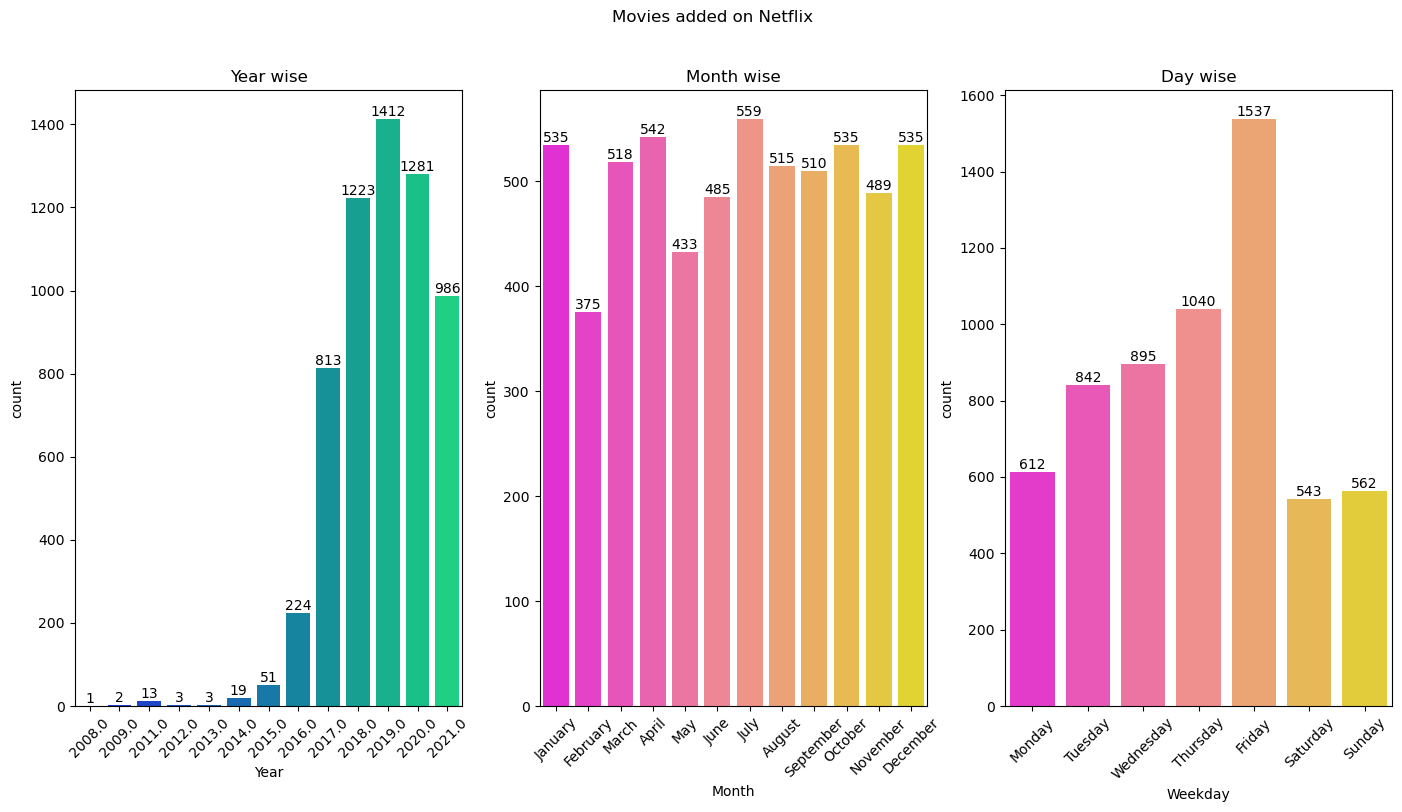

In [69]:
plt.figure(figsize=(17,8))
plt.suptitle('Movies added on Netflix')

plt.subplot(1,3,1)
label=sns.countplot(data=df_movies_temp,x='year',order=mv_year.index,palette='winter')
for i in label.containers:
    label.bar_label(i)
plt.xticks(rotation=45)
plt.xlabel('Year')
plt.title('Year wise')

plt.subplot(1,3,2)
label=sns.countplot(data=df_movies_temp,x='month_name',order=mv_month.index,palette='spring')
for i in label.containers:
    label.bar_label(i)
plt.xticks(rotation=45)
plt.xlabel('Month')
plt.title('Month wise')

plt.subplot(1,3,3)
label=sns.countplot(data=df_movies_temp,x='weekday',order=mv_day.index,palette='spring')
for i in label.containers:
    label.bar_label(i)
plt.xticks(rotation=45)
plt.xlabel('Weekday')
plt.title('Day wise')
plt.show()

C:\Users\Harshita\AppData\Local\Temp\ipykernel_8836\206861452.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  label=sns.countplot(data=df_tvs_temp,x='year',order=tv_year.index,palette='winter')
C:\Users\Harshita\AppData\Local\Temp\ipykernel_8836\206861452.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  label=sns.countplot(data=df_tvs_temp,x='month_name',order=tv_month.index,palette='spring')
C:\Users\Harshita\AppData\Local\Temp\ipykernel_8836\206861452.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  label=sns.countplot(data=df_tvs_temp,x='weekday',order=tv_day.i

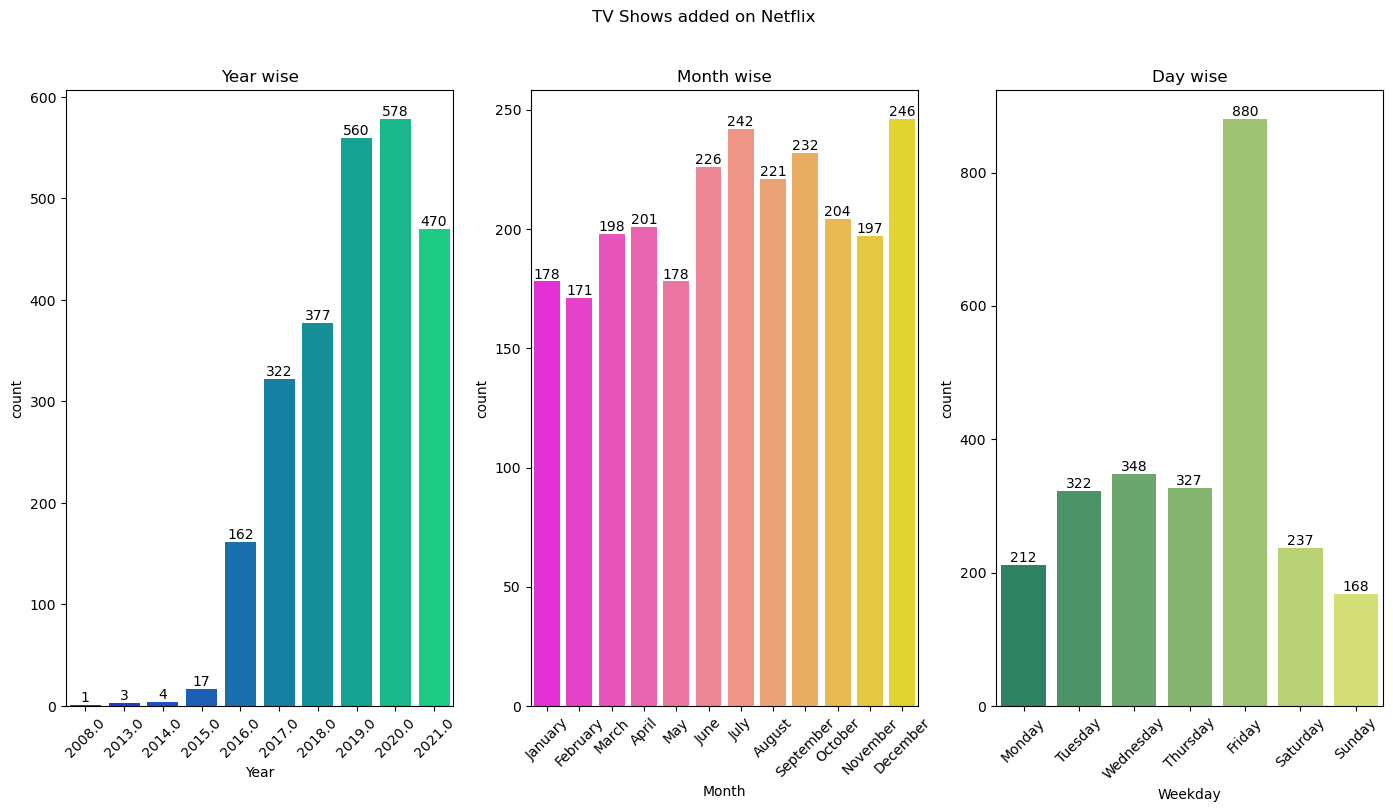

In [70]:
df_tvs_temp=df_tvs.drop_duplicates(subset=['year','title'])

tv_year=df_tvs_temp['year'].value_counts()
tv_year.sort_index(inplace=True)

month_order=['January','February','March','April','May','June','July','August','September','October','November','December']
tv_month=df_tvs_temp['month_name'].value_counts().loc[month_order]

day_order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
tv_day=df_tvs_temp['weekday'].value_counts().loc[day_order]

plt.figure(figsize=(17,8))
plt.suptitle('TV Shows added on Netflix')

plt.subplot(1,3,1)
label=sns.countplot(data=df_tvs_temp,x='year',order=tv_year.index,palette='winter')
for i in label.containers:
    label.bar_label(i)
plt.xticks(rotation=45)
plt.xlabel('Year')
plt.title('Year wise')

plt.subplot(1,3,2)
label=sns.countplot(data=df_tvs_temp,x='month_name',order=tv_month.index,palette='spring')
for i in label.containers:
    label.bar_label(i)
plt.xticks(rotation=45)
plt.xlabel('Month')
plt.title('Month wise')

plt.subplot(1,3,3)
label=sns.countplot(data=df_tvs_temp,x='weekday',order=tv_day.index,palette='summer')
for i in label.containers:
    label.bar_label(i)
plt.xticks(rotation=45)
plt.xlabel('Weekday')
plt.title('Day wise')
plt.show()

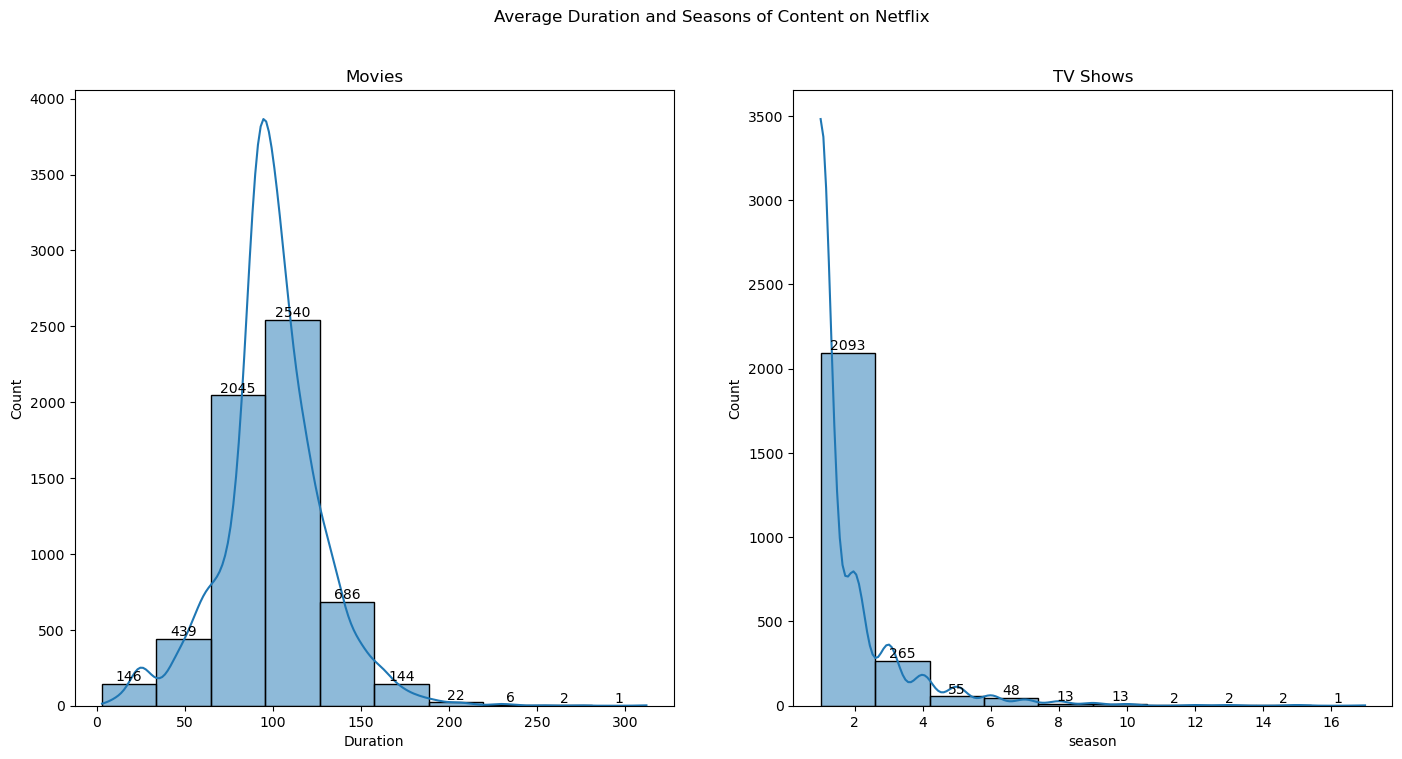

In [71]:
df_movies_temp=df_movies.drop_duplicates(subset=['duration','title'])
df_tvs_temp=df_tvs.drop_duplicates(subset=['Seasons','title'])

plt.figure(figsize=(17,8))
plt.suptitle('Average Duration and Seasons of Content on Netflix')

plt.subplot(1,2,1)
label=sns.histplot(df_movies_temp['duration'].astype(int),bins=10,kde=True)
for i in label.containers:
    label.bar_label(i)
plt.xlabel('Duration')
plt.title('Movies')


plt.subplot(1,2,2)
label=sns.histplot(df_tvs_temp['Seasons'].astype(int),bins=10,kde=True)
for i in label.containers:
    label.bar_label(i)
plt.xlabel('season')
plt.title('TV Shows')
plt.show()

C:\Users\Harshita\AppData\Local\Temp\ipykernel_8836\4159441688.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_movies_temp['duration']=df_movies_temp['duration'].astype(int)
C:\Users\Harshita\AppData\Local\Temp\ipykernel_8836\4159441688.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tvs_temp['Seasons']=df_tvs_temp['Seasons'].astype(int)


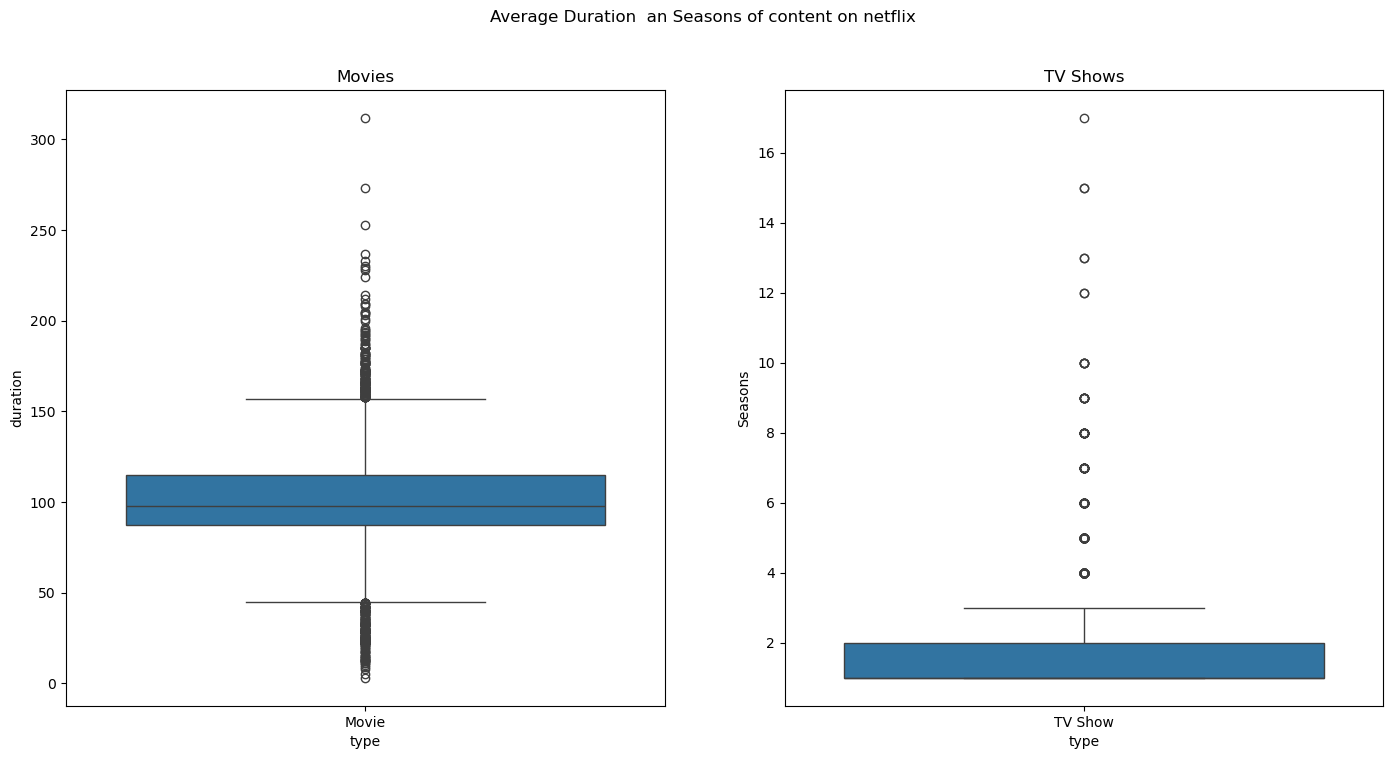

In [77]:
df_movies_temp['duration']=df_movies_temp['duration'].astype(int)
df_tvs_temp['Seasons']=df_tvs_temp['Seasons'].astype(int)

plt.figure(figsize=(17,8))
plt.suptitle('Average Duration  an Seasons of content on netflix')

plt.subplot(1,2,1)
sns.boxplot(df_movies_temp, x='type', y='duration')
plt.title('Movies')

plt.subplot(1,2,2)
sns.boxplot(df_tvs_temp, x='type', y='Seasons')
plt.title('TV Shows')

plt.show()

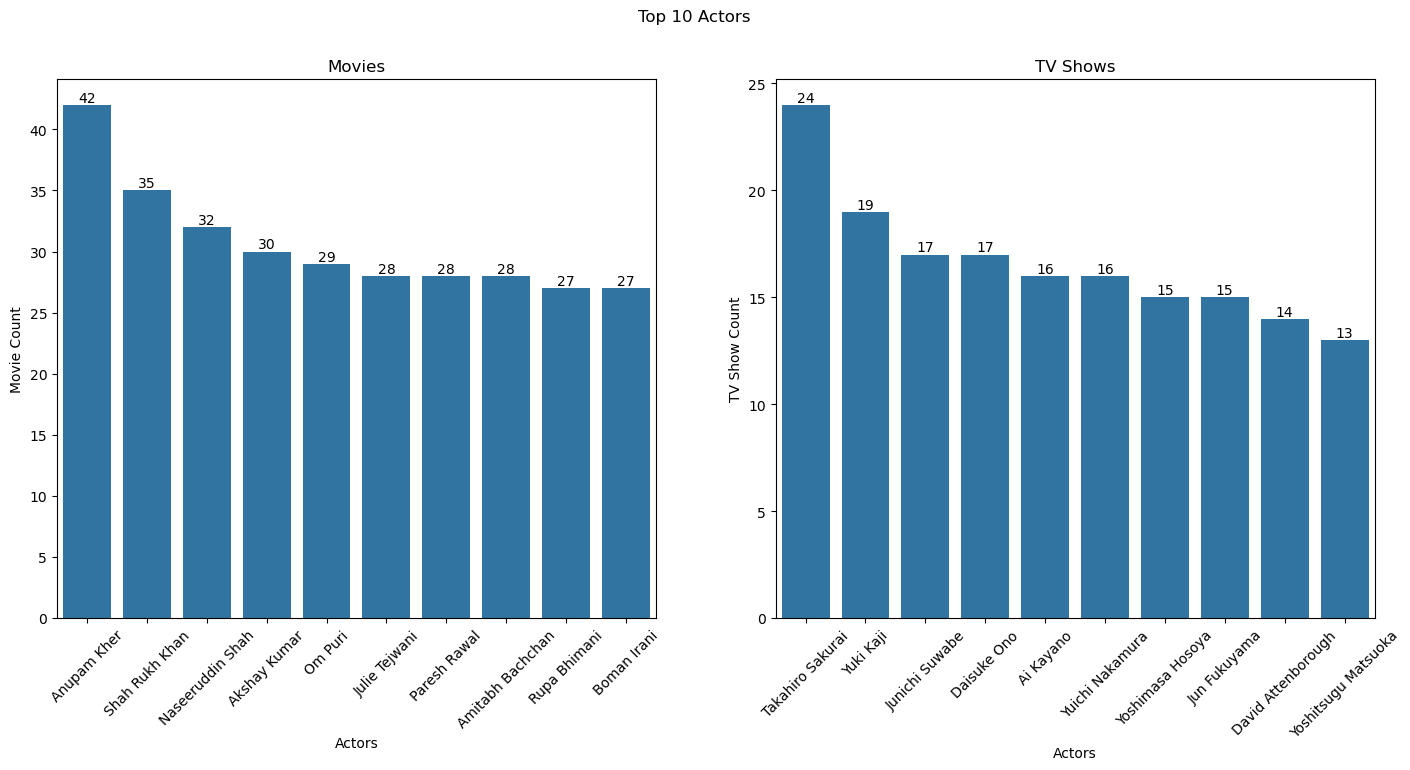

In [79]:
df_movies_temp=df_movies.drop_duplicates(subset=['cast','title'])
df_tvs_temp=df_tvs.drop_duplicates(subset=['cast','title'])

plt.figure(figsize=(17,7))
plt.suptitle('Top 10 Actors')

plt.subplot(1,2,1)
label=sns.countplot(data=df_movies_temp,x='cast',
                   order=df_movies_temp['cast'].value_counts()[1:11].index)
for i in label.containers:
    label.bar_label(i)
plt.title('Movies')
plt.xticks(rotation=45)
plt.xlabel('Actors')
plt.ylabel('Movie Count')

plt.subplot(1,2,2)
label=sns.countplot(data=df_tvs_temp,x='cast',
                   order=df_tvs_temp['cast'].value_counts()[1:11].index)
for i in label.containers:
    label.bar_label(i)
plt.title('TV Shows')
plt.xticks(rotation=45)
plt.xlabel('Actors')
plt.ylabel('TV Show Count')

plt.show()

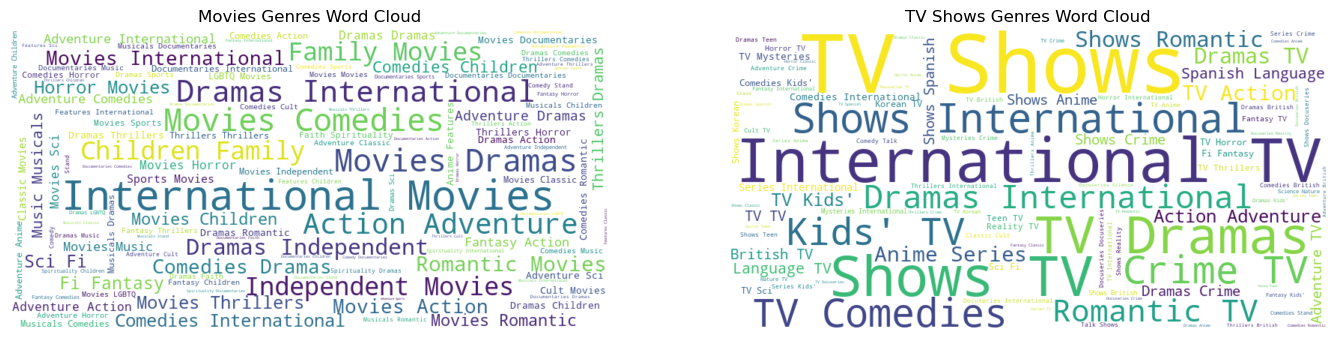

In [83]:
genre_text= ' '.join(df_movies['genre'])
wordcloud=WordCloud(width=800,height=400,background_color='white').generate(genre_text)

plt.figure(figsize=(17,10))

plt.subplot(1,2,1)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.title('Movies Genres Word Cloud')

genre_text= ' '.join(df_tvs['genre'])
wordcloud=WordCloud(width=800,height=400,background_color='white').generate(genre_text)

plt.subplot(1,2,2)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.title('TV Shows Genres Word Cloud')

plt.show()

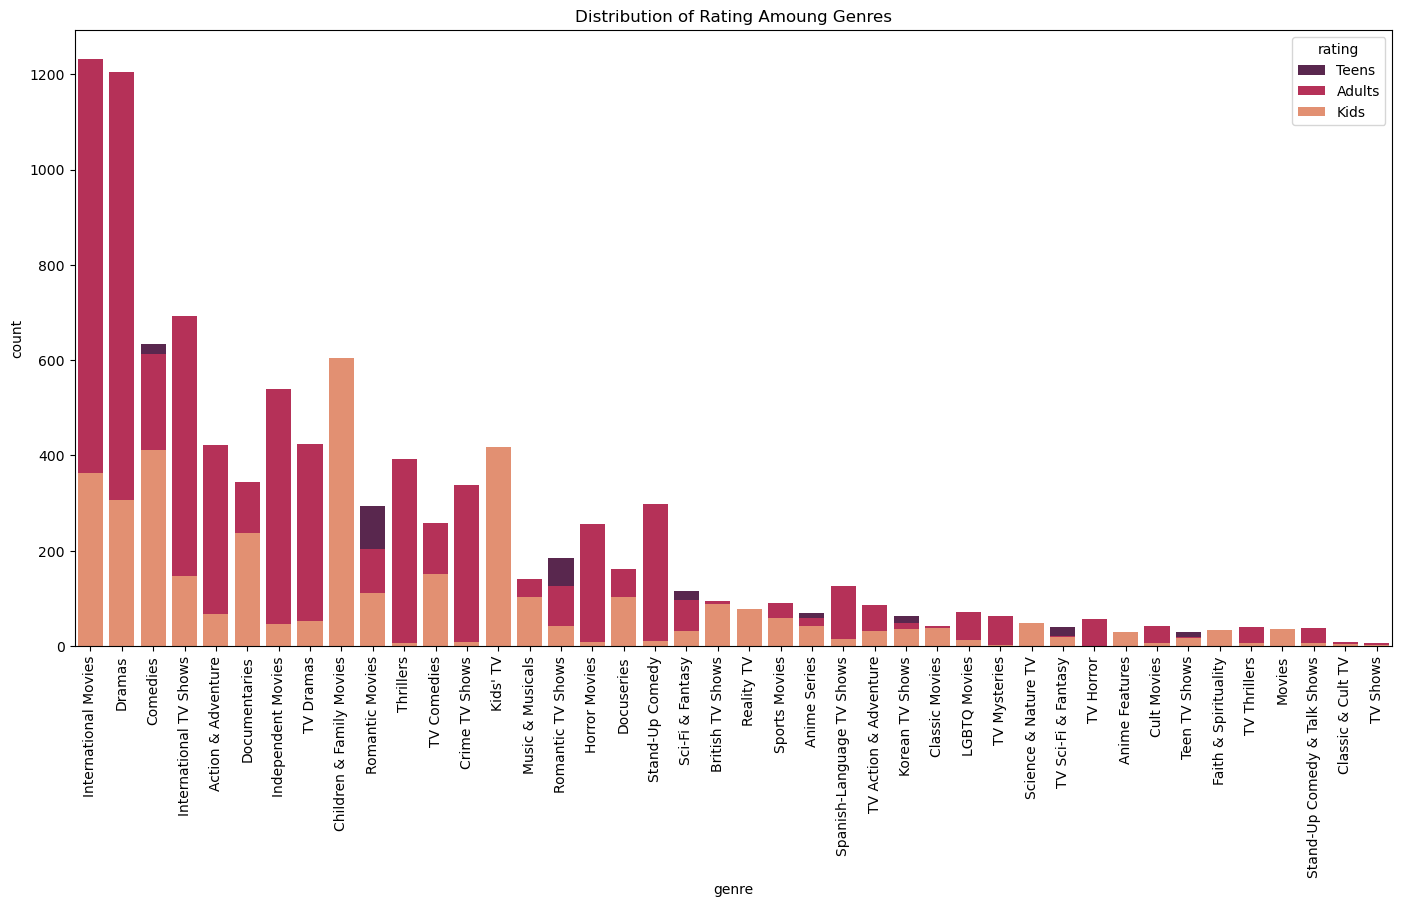

In [85]:
df_temp=df_new.drop_duplicates(subset=['genre','title'])

plt.figure(figsize=(17,8))
plt.title('Distribution of Rating Amoung Genres')
sns.countplot(data=df_temp,x='genre',hue='rating',dodge=False,order=df_temp['genre'].value_counts().index,palette='rocket')
plt.xticks(rotation=90)
plt.show()

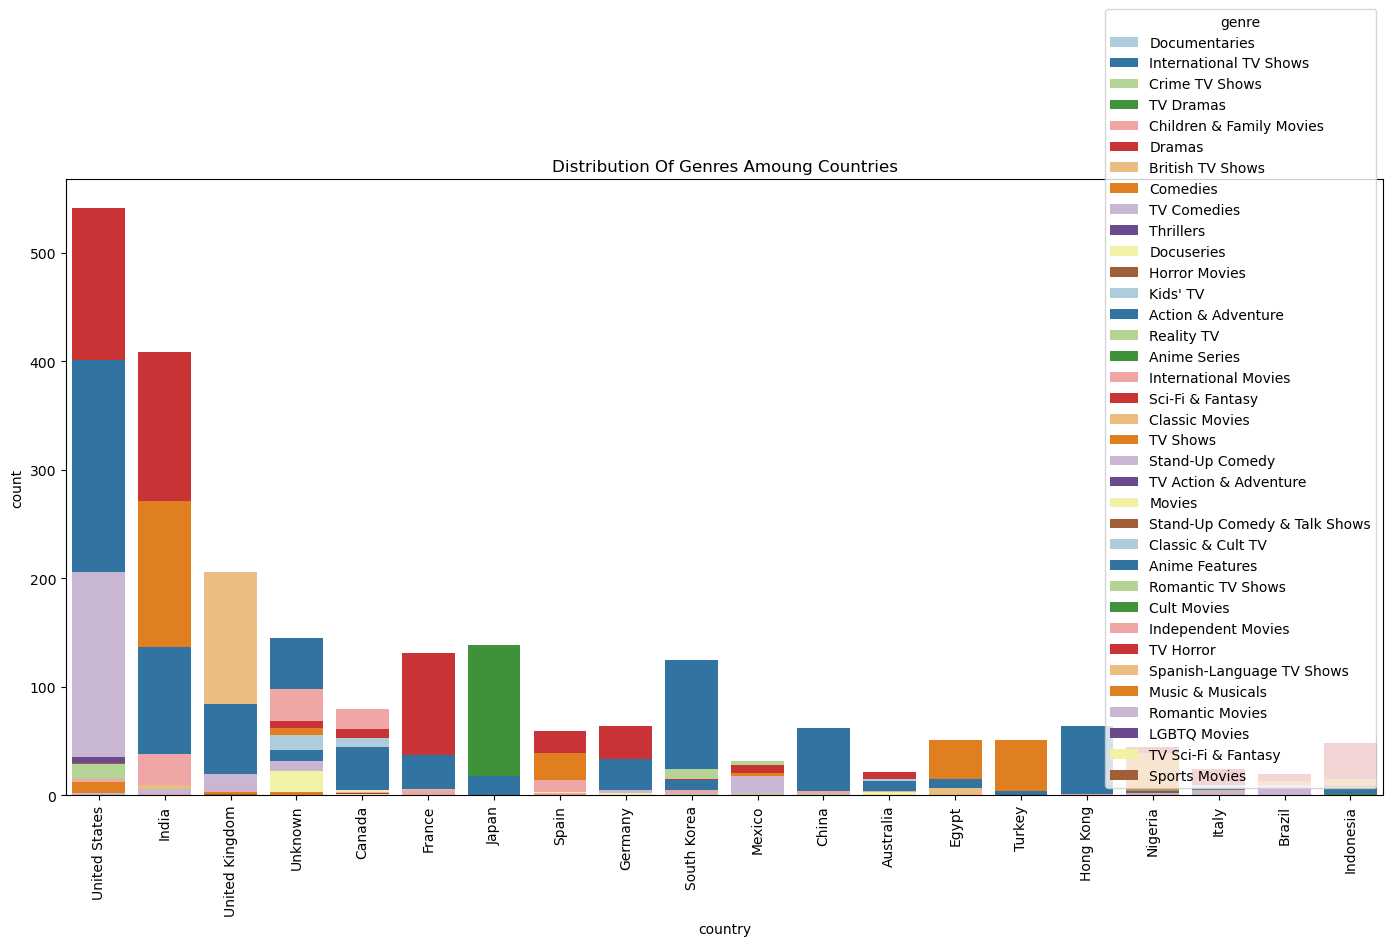

In [87]:
df_temp=df_new.drop_duplicates(subset=['country','title'])

plt.figure(figsize=(17,8))
plt.title('Distribution Of Genres Amoung Countries')
sns.countplot(data=df_temp,x='country',hue='genre',dodge=False,
             order=df_temp['country'].value_counts().head(20).index,palette='Paired')
plt.xticks(rotation=90)
plt.show()

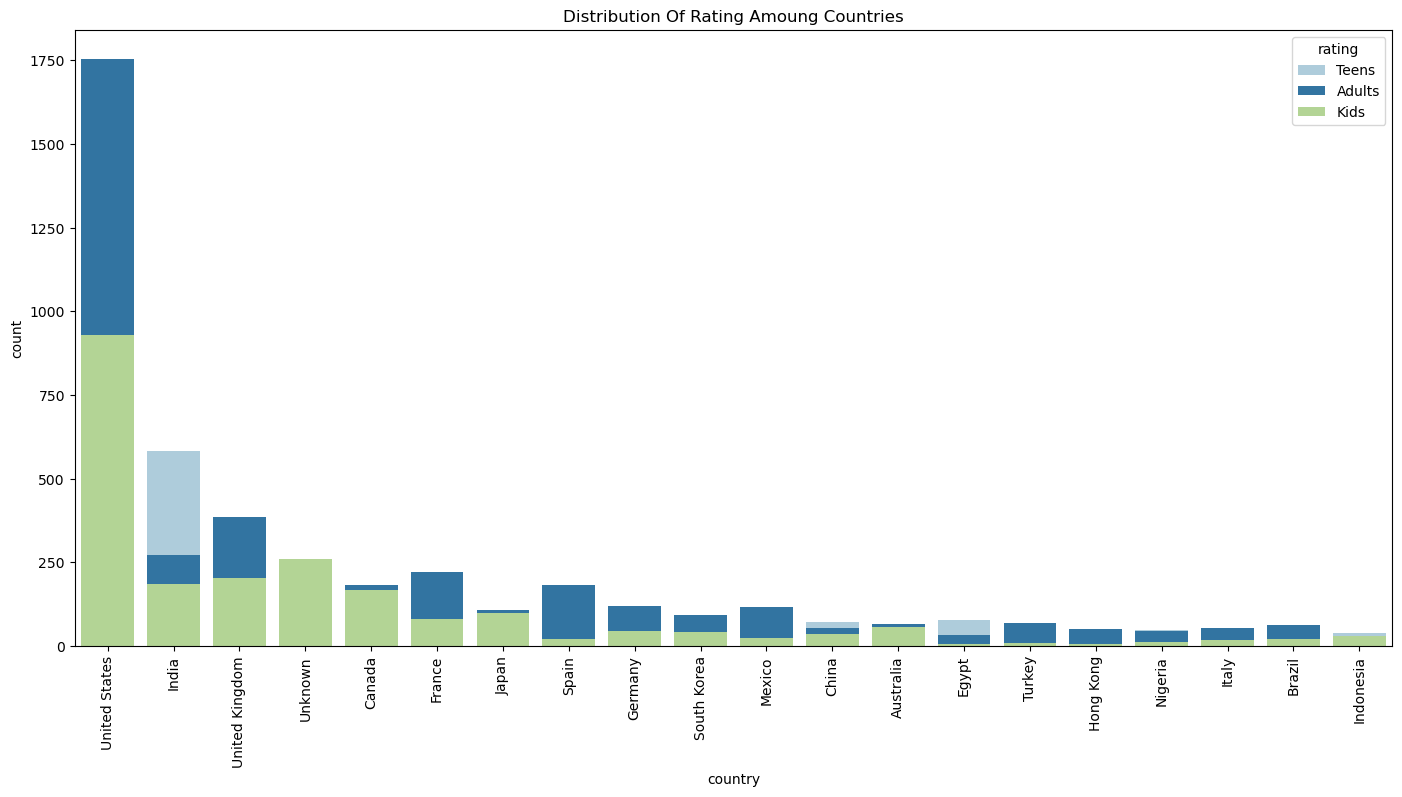

In [89]:
df_temp=df_new.drop_duplicates(subset=['country','title'])

plt.figure(figsize=(17,8))
plt.title('Distribution Of Rating Amoung Countries')
sns.countplot(data=df_temp,x='country',hue='rating',dodge=False,
             order=df_temp['country'].value_counts().head(20).index,palette='Paired')
plt.xticks(rotation=90)
plt.show()